<a href="https://colab.research.google.com/github/vsalahi/PGP-DSBA-UTA/blob/BusinessStatistics/ENews_Express_Learner_Notebook_5BFull_Code_Version_5D_VahidSalahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. 

The design team of the company has created a new landing page. Company wantes to decide whether the new landing page is more effective to gather new subscribers. There is a randomly selected sample of 100 users which they are divided equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'.


### Objectives
To perform statistical analysis on the provided sample to answer the following questions:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the old landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the mean time spent on the new page same for the different language users?

## Data Dictionary

1. user_id - This represents the user ID of the person visiting the website.

2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).

3. landing_page - This represents whether the landing page is new or old.

4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.

6. language_preferred - This represents the language chosen by the user to view the landing page.

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [ ]:
# reading the data
df = pd.read_csv('abtest.csv')
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# check number of records
df.shape

(100, 6)

In [ ]:
# get information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [ ]:
# number of unique values for categorical attributes
cat_cols = ['group','landing_page','converted','language_preferred']
df[cat_cols].nunique()

group                 2
landing_page          2
converted             2
language_preferred    3
dtype: int64

In [ ]:
# number of records for each item of a category 
for i in cat_cols:
    print(df[i].value_counts(),'\n\n')

control      50
treatment    50
Name: group, dtype: int64 


new    50
old    50
Name: landing_page, dtype: int64 


yes    54
no     46
Name: converted, dtype: int64 


French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64 




In [ ]:
# check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations
* Data includes 100 rows and 6 columns.
* Columns are consist of 4 categorical and 1 numeric attributes (excluding the user_id column).
* There are no missing values in the data.
* Attributes with "object" data type can be converted to pandas "category" data type for the purpose of memory efficiency.

In [ ]:
# Converting "objects" to "category"
df[['group','landing_page','converted','language_preferred']] = df[['group'
                                                                    ,'landing_page'
                                                                    ,'converted'
                                                                    ,'language_preferred']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


### Summary statistics

In [ ]:
df.describe(include='category').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,new,50
converted,100,2,yes,54
language_preferred,100,3,French,34


In [ ]:
df.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height() + 0.5         # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
    plt.show() # show the plot

def per_calc(feature):
    x1 = feature.value_counts()[0]
    x2 = feature.value_counts()[1]
    total = len(feature)
    x1_perc = x1/total
    x2_perc = x2/total
    return x1_perc, x2_perc

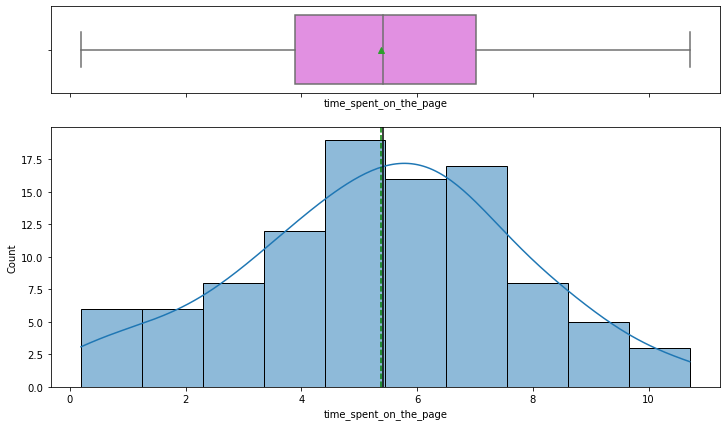

In [ ]:
histogram_boxplot(df, 'time_spent_on_the_page', kde=True, bins=10)

The time users spent on the page seems to follow a normal distribution and central tendency.

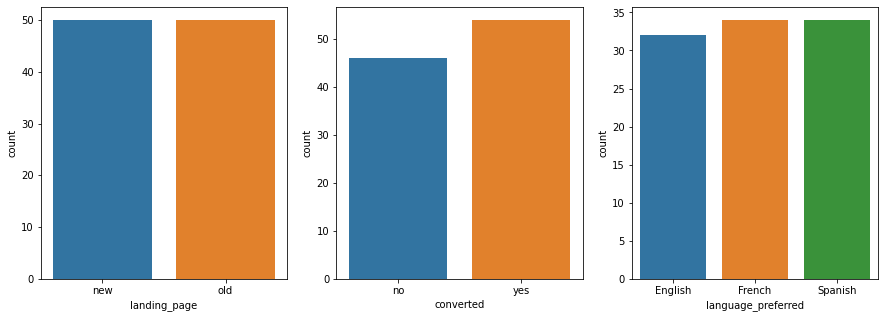

In [ ]:
# Distribution of data over categorical attributes
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.countplot(ax = axs[0], data = df, x = 'landing_page')
sns.countplot(ax = axs[1], data = df, x = 'converted')
sns.countplot(ax = axs[2], data = df, x = 'language_preferred')
plt.show()

### Bivariate Analysis

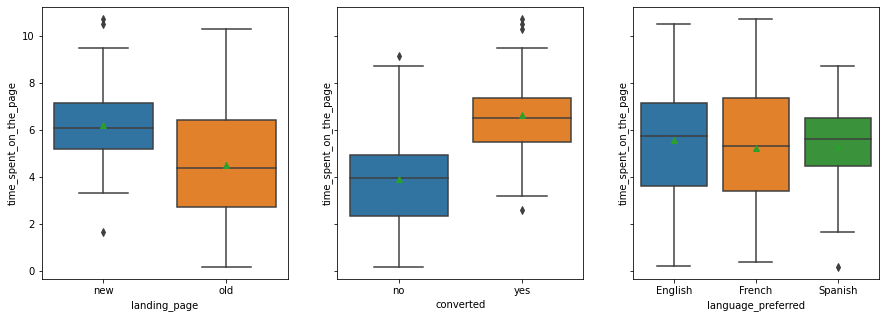

In [ ]:
# distribution of time spent on the page for each categorical attributes
fig, axs = plt.subplots(1,3, sharey=True, figsize=(15,5))
sns.boxplot(ax = axs[0], data = df, y = 'time_spent_on_the_page', x = 'landing_page', showmeans=True)
sns.boxplot(ax = axs[1], data = df, y = 'time_spent_on_the_page', x = 'converted', showmeans=True)
sns.boxplot(ax = axs[2], data = df, y = 'time_spent_on_the_page', x = 'language_preferred', showmeans=True)
plt.show()

* The distribution of time for each landing page seems normal. On this sample, on average, users spent more time on the new landing page.
* User who subscribed to the channel spent more time on the channel in this sample.
* It seems that users with different preferred language spent around the same time on the channel.

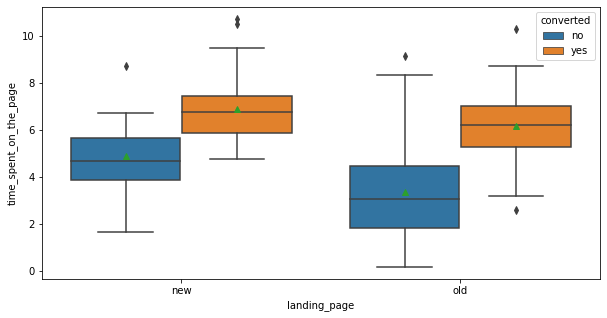

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, y = 'time_spent_on_the_page', x = 'landing_page', 
            hue='converted', hue_order= ['no', 'yes'], showmeans=True);

Irrelevent to the landing page being new or old, users who subscribed to the channel, on average, spent more time on the page.

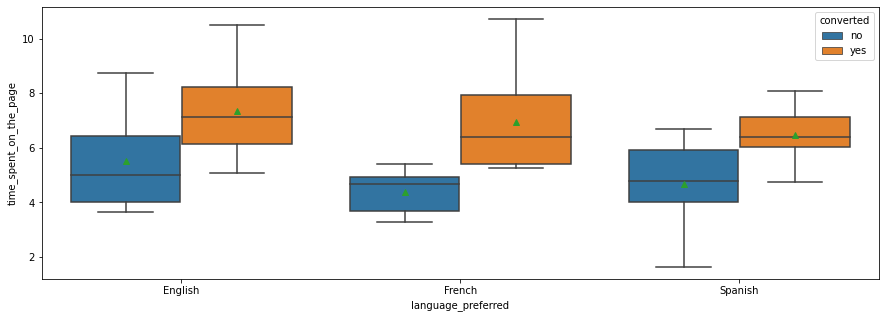

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df[df['landing_page'] == 'new'], y = 'time_spent_on_the_page', 
            x = 'language_preferred', hue='converted', hue_order= ['no', 'yes'], showmeans=True);

Same as previous graph, here we can see that irrelevant to the language, users who subscribed to the channel spent more time on the page.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Visual Analysis

The average time spent on the new landing page is 6.2 minutes
The average time spent on the old landing page is 4.5 minutes


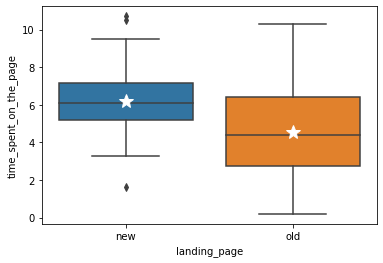

In [ ]:
# box plot to show variability and means:
sns.boxplot(data = df, y = 'time_spent_on_the_page', x = 'landing_page', showmeans=True,
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                       "markersize":"15"});

#sample means for the two samples
print('The average time spent on the new landing page is ' + 
      str(round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].mean(),1)) + ' minutes')

print('The average time spent on the old landing page is ' + 
      str(round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].mean(),1)) + ' minutes')

### Observation
For this sample of data, on average users spent more time on the new landing page in comparison to the old landing page. However, is the difference large enough to conclude that users spent more time on the new landing page in general (in the population)? The hypotesis testing below will give us more clude on that.

### Step 1: Define the null and alternate hypotheses

Assuming $\mu_{new}$ and $\mu_{old}$ to be the average time users spent on the new and old landing pages respectively, the null and alternatives hypothesises can be defined as:


>$H_0:\mu_{new}=\mu_{old}$

>$H_a:\mu_{new}>\mu_{old}$

### Step 2: Select Appropriate test

In [ ]:
# check to see if the samples have equal standard deviations
print('Standard deviation for time that users spent on new landing page is', 
      round(df[df['landing_page'] == 'new']['time_spent_on_the_page'].std(),3))

print('Standard deviation for time that users spent on old landing page is',
      round(df[df['landing_page'] == 'old']['time_spent_on_the_page'].std(),3))

Standard deviation for time that users spent on new landing page is 1.817
Standard deviation for time that users spent on old landing page is 2.582


We are comparing the mean value for two categories. Since the population standard deviation is unknow, upon satisfying the ceriteria, two sample T-test can be performed:
* The time useres spent on the page is continuous.
* Sample sizes are greater than 30 (50 for each new and old samples), therefore, Central Limit Theorem applies and the distribution of sample means will be normal.
* Since samples are taken randomly from different users, the two samples are independent.
* Samples are randomly taken from the population as mentioned.

All conditions are met to use the two sample T-test.

### Step 3: Decide the significance level

As given, the level of significance is 0.05.

### Step 4: Collect and prepare data

In [ ]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is ' + str(p_value))

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$ and draw conclusion

P-value is way less than 0.05 as our level of significant which provide us enough evidence to reject the null hypothesis. This implies that on average, users spent more time on the new landing page in comparison to the old landing page. 

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Visual Analysis
Barplot below shows the two samples of the users on the old and new landing page with the same size (50 users for each sample). As it can be seen, users on the new landing page subscribed more to the channel.

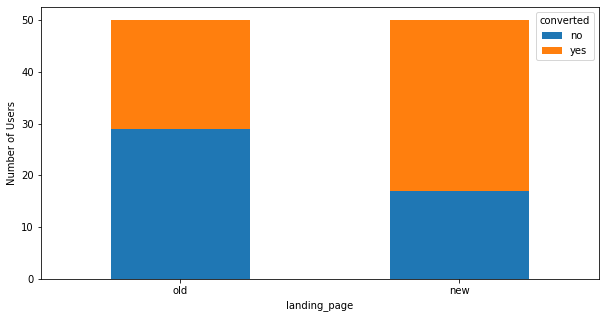

In [ ]:
df_plot = df.groupby(['converted', 'landing_page']).size().reset_index().pivot(columns='converted',
                                                                               index='landing_page',
                                                                               values=0).sort_values('landing_page',
                                                                                                     ascending=False);
df_plot.plot(kind='bar', stacked=True, figsize=(10,5), rot = 0, ylabel = 'Number of Users');

### Step 1: Define the null and alternate hypotheses
Assuming $p_{new}$ and $p_{old}$ to be the proportions of users who became subcriber from the new and old landing pages respectively, the null and alternatives hypothesises can be defined as:


>$H_0:p_{new}=p_{old}$

>$H_a:p_{new}>p_{old}$

### Step 2: Select Appropriate test
Two proportions are being compared from two samples. If criteria are met, the two-samples proportion Z-test can be used. Here are the checks for the test's assumptions:
* Random sampling from the population - Yes, samples are taken randomly from users.
* Binomally distributed population - Yes, users either subscribed or didn't.
* Central Limit teorem works on binomial distribution as it is close to normal distribution.
* Check whether $np$ and $n(1-p)$ are greater than or equal to 10. Below is to find the $n$ and $p$ for new and old page landing samples:

In [ ]:
n_new = df[df['landing_page'] == 'new']['landing_page'].shape[0]
p_new = df[(df['landing_page'] == 'new') & (df['converted'] == 'yes')]['landing_page'].shape[0] / n_new
n_old = df[df['landing_page'] == 'old']['landing_page'].shape[0]
p_old = df[(df['landing_page'] == 'old') & (df['converted'] == 'yes')]['landing_page'].shape[0] / n_old

print("n_new * p_new = {} > 10".format(int(n_new * p_new)))
print("n_new * (1 - p_new) = {} > 10".format(int(n_new * (1-p_new))))
print("n_old * p_old = {} > 10".format(int(n_old * p_old)))
print("n_old * (1 - p_old) = {} > 10".format(int(n_old * (1-p_old))))

n_new * p_new = 33 > 10
n_new * (1 - p_new) = 17 > 10
n_old * p_old = 21 > 10
n_old * (1 - p_old) = 29 > 10


### Step 3: Calculate the p-value


In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# prepare the arguments for the two proportion Z-test: 
counts = np.array([n_new*p_new,n_old*p_old])
nobs = np.array([n_new,n_old])

# find the p-value
test_stat, p_value = proportions_ztest(counts, nobs, alternative="larger")
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 4: Conclusion
Considering $\alpha = 0.05$ as the level of the significant, since the value is less than $\alpha$, we have enough evidence to reject the null hypothesis and conclude that the rate of users who subscribed to the channel is higher form the new landing page than the old page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Visual Analysis
Graph below shows the number of users based off of their language preference and if they subscribed to the channel or not. From the graph, it appears that users with English as their preferred language subscribed to the channel more. However, this should be tested against the null hypotesis that language is indepenent from conversion rate.

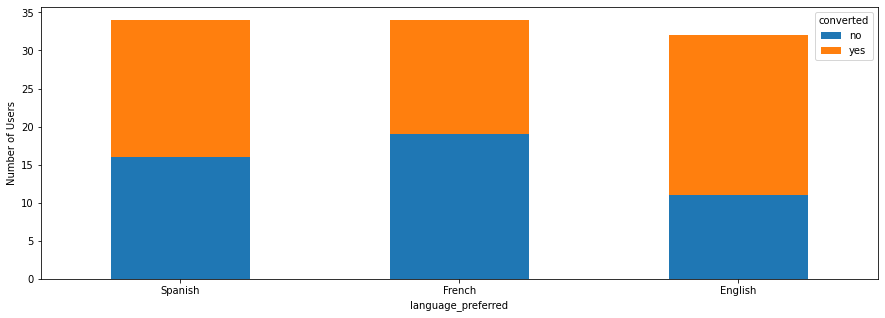

In [ ]:
df_plot = df.groupby(['converted', 'language_preferred']
                    ).size().reset_index().pivot(columns='converted', 
                                                 index='language_preferred', 
                                                 values=0).sort_values('language_preferred', 
                                                                       ascending=False);
df_plot.plot(kind='bar', stacked=True, figsize=(15,5), rot = 0, ylabel = 'Number of Users');

### Step 1: Define the null and alternate hypotheses
The null and alternative hypothesis areas below:

>$H_0:$ users who subscribed and their preferred language are independent

>$H_a:$ users who subscribed and their preferred language are dependent

In [ ]:
print("n_new * p_new = {} > 10".format(int(n_new * p_new)))
print("n_new * (1 - p_new) = {} > 10".format(int(n_new * (1-p_new))))
print("n_old * p_old = {} > 10".format(int(n_old * p_old)))
print("n_old * (1 - p_old) = {} > 10".format(int(n_old * (1-p_old))))

n_new * p_new = 33 > 10
n_new * (1 - p_new) = 17 > 10
n_old * p_old = 21 > 10
n_old * (1 - p_old) = 29 > 10


### Step 2: Select Appropriate test
The Chi-Square for independece test can be used to check if the users' conversion is dependent on their preferred language. Below is the data prepared for the test: 

In [ ]:
conversion_language_contingency = df.pivot_table(index = 'language_preferred', values ='user_id', 
                                                 columns ='converted', aggfunc='count')
conversion_language_contingency

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [ ]:
# or
pd.crosstab(df['language_preferred'],df['converted'])

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


The following assumptions are valid for this sample and we can use the Chi-Square test.
* Categorical variables
* Based on the table above, the number of sample observations in each category is at least 5
* Random sampling from the population

### Step 3: Calculate the p-value


In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(conversion_language_contingency)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 4: Conclusion
Considering $\alpha = 0.05$ as the level of the significant, p-value is greater than $\alpha$ and therefore, we do not have enough evidence to reject the null hypothesis. As a result, we cannot conclude that users' convertion and their preferred language are dependent.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Visual Analysis
Graph below shows the number of the of users based off of their language preference and if they become subscriber or not.

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

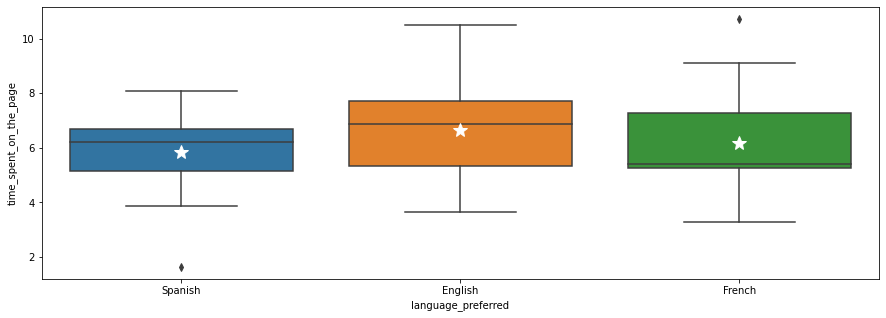

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df[df['landing_page'] == 'new'], y = 'time_spent_on_the_page', x = 'language_preferred',
            showmeans=True, order = list(df['language_preferred'].unique()), 
            meanprops={"marker":"*",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                       "markersize":"15"});

#sample means for the two samples
df_new_page = df[df['landing_page'] == 'new']

# print mean values for each language
df_new_page.groupby('language_preferred')['time_spent_on_the_page'].mean()

### Step 1: Define the null and alternate hypotheses
Assuming $\mu_1, \mu_2, \mu_3$ to be the average time users spent on the new page for each preferred language. The null and alternative hypotheses are:

>$H_0: \mu_1 = \mu_2 = \mu_3$

>$H_a: $ At least one of the averages is different


### Step 2: Select Appropriate test
Here we are comparing three sample means. One way ANOVA test can be used to test equality of the three sample means. First, the normality and equality of variance assumptions need to be checked.

####  Test for normality - Shapiro-Wilk’s test
Null and alternative hypotheses are as below:
>$H_0:$ The variable 'time users spent on the new page' follows a normal distribution

>$H_a:$ 'time users spent on the new page' does not follow a normal distribution


In [ ]:
# import the required function
from scipy import stats

# find the p-value
shapiro_tt, p_value = stats.shapiro(df_new_page['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Assuming same level of significance of $\alpha = 0.05$, since the p-value is greater, we cannot reject the null hypothesis and we can stay with it which says the time users spent on the new page follows a normal distribution.

####  Test for equality of variance - Levene’s test
Null and alternative hypotheses are as below:
>$H_0:$ Variences of the 'time users spent on the new page' for each preferred-language are equal

>$H_a:$ At least one variance is different.


In [ ]:
#import the required function
from scipy.stats import levene
leven_tt, p_value = levene(df_new_page[df_new_page['language_preferred']=="Spanish"]['time_spent_on_the_page'], 
                            df_new_page[df_new_page['language_preferred']=="English"]['time_spent_on_the_page'], 
                            df_new_page[df_new_page['language_preferred']=="French"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is larger than $\alpha = 0.05$, we fail to reject the null hypothesis of equality of variances.

Therefore, the criteria for using the one-way ANOVA test are met and we can proceed with it.

### Step 3: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import f_oneway

# perform one-way anova test
leven_tt, p_value = f_oneway(df_new_page[df_new_page['language_preferred']=="Spanish"]['time_spent_on_the_page'], 
                            df_new_page[df_new_page['language_preferred']=="English"]['time_spent_on_the_page'], 
                            df_new_page[df_new_page['language_preferred']=="French"]['time_spent_on_the_page'])

print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 4: Conclusion
Considering $\alpha = 0.05$ as the level of the significant, p-value is greater than $\alpha$ and we fail to reject the null hypothesis. As a result, we cannot conclude that on average, users with different language preference, spent less or more time on the new page.

## Conclusion and Business Recommendations

* On average, users spent more time on the new page. This implies the new landing page is more effective to interest the users.
* Also, more of users subscribed to the channel on the new landing page than the old page. This also proves the effectiveness of the new landing page. 
* In general, rate ofconverting to subscriber is independent of the users' langaue preference.
* Users with different langages spent equal time on the new landing page on average.
* It is recommended to use the new landing page for the future.
* Keeping the users spending more time on the page, increase the chance for them to subcribe to the channel. 
